# Function dct

## Synopse

Discrete Cossine Transform.

- **F = dct(f)**

  - **F**:output: image dct transform. 
  - **f**:input: input image. 

In [6]:
import numpy as np

def dct(f):
    import ia898.src as ia
    f = f.astype(np.float64)
    if len(f.shape) == 1: f = f[:,np.newaxis]
    (m, n) = f.shape
    if (n == 1):
        A = ia.dctmatrix(m)
        F = np.dot(A, f)
    else:
        A=ia.dctmatrix(m)
        B=ia.dctmatrix(n)
        F = np.dot(np.dot(A, f), np.transpose(B))
    return F


## Examples

In [7]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python dct.ipynb
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook dct.ipynb to python
[NbConvertApp] Writing 3019 bytes to dct.py


### Example 1

In [8]:
if testing:
    np.set_printoptions(suppress=True, precision=2)
    f = np.array([[4,3,2,1],[3,3,2,1],[2,2,2,1],[1,1,1,1]])
    print('Matriz original:\n',f)
    F = ia.dct(f)
    print('\nDCT:\n',F)   

Matriz original:
 [[4 3 2 1]
 [3 3 2 1]
 [2 2 2 1]
 [1 1 1 1]]

DCT:
 [[ 7.5   2.23 -0.5   0.16]
 [ 2.23  1.71  0.    0.  ]
 [-0.5   0.    0.5  -0.  ]
 [ 0.16 -0.   -0.    0.29]]


### Example 2

""
Imagem original

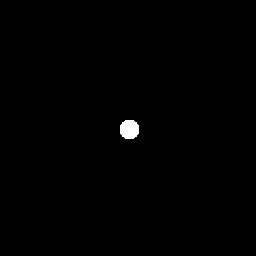

""
DCT

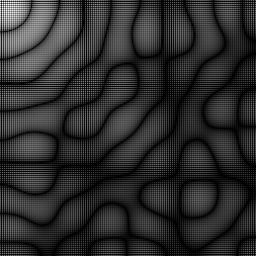

In [9]:
if testing:
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import sys,os
    ia898path = os.path.abspath('/home/lotufo')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia
    
    r,c = np.indices( (256, 256) )

    f = ( (r-129)**2 + (c-129)**2 < 10**2)*255
    ia.adshow(ia.normalize(f),'Imagem original')
    
    F = ia.dct(f)
    
    ia.adshow( ia.normalize(np.log(abs(F)+1)),'DCT')
    

### Example 3
Compare with dft

""
Imagem original
""
DFT
""
DCT

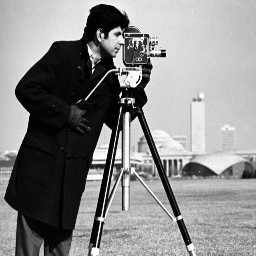
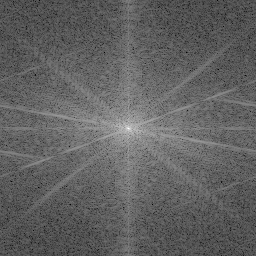
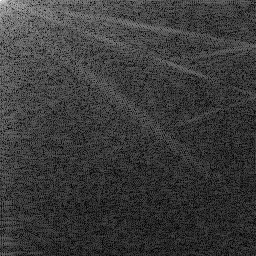

Tempo de execução DFT:
100 loops, best of 3: 2.19 ms per loop

Tempo de execução DCT:
100 loops, best of 3: 5.84 ms per loop


In [10]:
if testing:
    f = mpimg.imread('../data/cameraman.tif')
    
    nb = ia.nbshow(3)
    nb.nbshow(f,'Imagem original')
    F1 = np.fft.fft2(f)
    F2 = ia.dct(f)
    nb.nbshow(ia.normalize(np.log(np.abs(ia.ptrans(F1,(f.shape[0]//2,f.shape[1]//2))+1))),'DFT' )
    nb.nbshow(ia.normalize(np.log(abs(F2)+1)),'DCT')
    nb.nbshow()
    
    print('Tempo de execução DFT:')
    %%timeit F1 = np.fft.fft2(f)
    print('\nTempo de execução DCT:')
    %%timeit F2 = ia.dct(f)
    

### Example 4
Compare with scipy function

""
Função do scipy
""
Função do toolbox

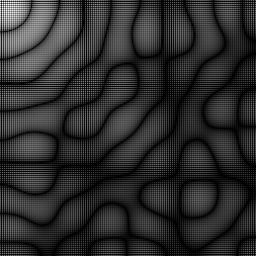
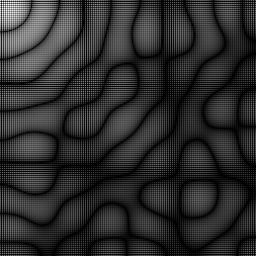

Diferença entre as duas funções (scipy e implementada): 7.81875958967e-09

Tempo de execução função implementada:
100 loops, best of 3: 5.89 ms per loop
Tempo de execução scipy:
1000 loops, best of 3: 1.39 ms per loop


In [11]:
if testing:
    from scipy.fftpack import dct as spdct
    r,c = np.indices( (256, 256) )
    f = ( (r-129)**2 + (c-129)**2 < 10**2)*255
    Fscipy = spdct(spdct(f,norm='ortho',axis=0),norm='ortho',axis=1)
    F = ia.dct(f)
    nb = ia.nbshow(2)
    nb.nbshow( ia.normalize(np.log(abs(Fscipy)+1)),'Função do scipy')
    nb.nbshow( ia.normalize(np.log(abs(F)+1)),'Função do toolbox')
    nb.nbshow()

    print('Diferença entre as duas funções (scipy e implementada):',np.sum(np.abs(Fscipy-F)))

    print('\nTempo de execução função implementada:')
    %%timeit F = ia.dct(f)
    print('Tempo de execução scipy:')
    %%timeit Fscipy = spdct(spdct(f,norm='ortho',axis=0),norm='ortho',axis=1) 